---

# **Wine Quality Prediction Project**

---


## **1. Introduction**

In this project, we aimed to predict the quality of red wines based on their physicochemical properties. Specifically, we classified wines as "good" or "not good" using two classification algorithms: the Optimized Decision Tree Classifier and the Random Forest Classifier.


In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Machine learning libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc

## **2. Data Preprocessing:**

### 2.1. Importing Libraries and Data

In [ ]:
df = pd.read_csv('winequality-red.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


### 2.2. Data Overview and Cleaning

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [ ]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [ ]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


### 2.3. Feature Engineering

In [ ]:
# Define the cutoff for wine quality
cutoff = 7

# Create a binary target variable (1 for good, 0 for not good)
df['quality_binary'] = np.where(df['quality'] >= cutoff, 1, 0)


### 2.4. Data Splitting and Scaling

In [ ]:
# Select features and target variable
X = df.drop(['quality', 'quality_binary'], axis=1)
y = df['quality_binary']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## **3. Model Training - Decision Tree Classifier:**

### 3.1. Decision Tree Classifier Training

In [ ]:
# Train a Decision Tree classifier
classifier = DecisionTreeClassifier(random_state=42)
classifier.fit(X_train_scaled, y_train)

DecisionTreeClassifier(random_state=42)

### 3.2. Making Predictions

In [ ]:
# Make predictions
y_pred = classifier.predict(X_test_scaled)

Accuracy: 0.871875


### 3.3. Model Evaluation - Accuracy and ROC Curve

Accuracy: 0.871875 



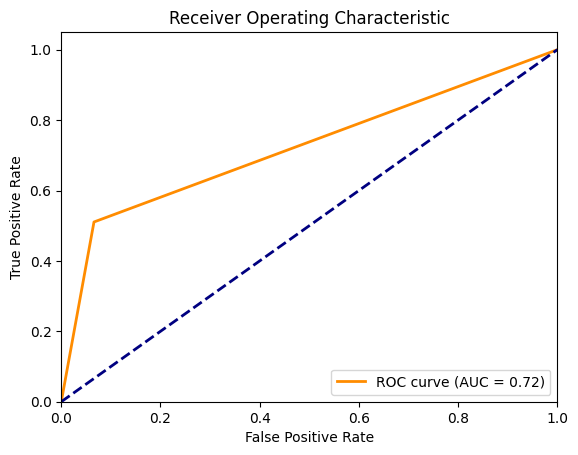

In [ ]:
# Evaluate the model - Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy} \n")

# Generate ROC curve and calculate AUC
y_prob = classifier.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()


### 3.4. Classification Report

In [ ]:
# Display classification report
print("\n Classification Report for 'Good' Wines:\n")
print(classification_report(y_test, y_pred, target_names=['Not Good', 'Good']))


 Classification Report for 'Good' Wines:

              precision    recall  f1-score   support

    Not Good       0.92      0.93      0.93       273
        Good       0.57      0.51      0.54        47

    accuracy                           0.87       320
   macro avg       0.74      0.72      0.73       320
weighted avg       0.87      0.87      0.87       320



### 3.5. Feature Importance for Predicting Wine Quality

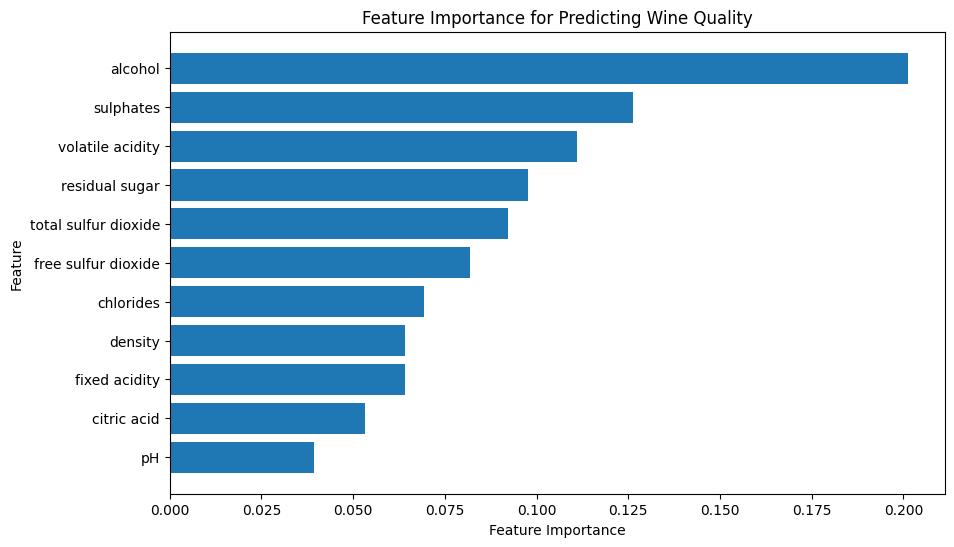

Accuracy: 0.871875


In [ ]:
# Calculate feature importances
feature_importances = classifier.feature_importances_

# Get the names of the features
feature_names = X.columns

# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance for Predicting Wine Quality')
plt.gca().invert_yaxis()  # Invert y-axis to display the most important features at the top
plt.show()

# Display classification report
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


## 4. Model Training - Random Forest Classifier:
### 4.1. Random Forest Classifier Training

In [ ]:
# Train a Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

### 4.2. Making Predictions

In [ ]:
# Make predictions with the Random Forest classifier
y_pred_rf = rf_classifier.predict(X_test_scaled)

### 4.3. Model Evaluation - Accuracy

In [ ]:
# Evaluate the Random Forest classifier - Accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf}")

Random Forest Accuracy: 0.9


### 4.4. Classification Report

In [ ]:
# Display classification report for Random Forest classifier
print("\nClassification Report for Random Forest Classifier:\n")
print(classification_report(y_test, y_pred_rf, target_names=['Not Good', 'Good']))


Classification Report for Random Forest Classifier:

              precision    recall  f1-score   support

    Not Good       0.92      0.97      0.94       273
        Good       0.73      0.51      0.60        47

    accuracy                           0.90       320
   macro avg       0.82      0.74      0.77       320
weighted avg       0.89      0.90      0.89       320



## **5. Model Training - Optimized Decision Tree Classifier:**
### 5.1. Optimized Decision Tree Classifier Training

In [ ]:
# Train the Optimized Decision Tree classifier
optimized_classifier = DecisionTreeClassifier(random_state=42)
optimized_classifier.fit(X_train_scaled, y_train)

DecisionTreeClassifier(random_state=42)

### 5.2. Making Predictions with Optimized Decision Tree Classifier

In [ ]:
# Make predictions with the Optimized Decision Tree classifier
y_pred_optimized = optimized_classifier.predict(X_test_scaled)

### 5.3. Model Evaluation - Accuracy for Optimized Decision Tree Classifier

In [ ]:
# Evaluate the Optimized Decision Tree classifier - Accuracy
accuracy_optimized = accuracy_score(y_test, y_pred_optimized)
print(f"Optimized Decision Tree Accuracy: {accuracy_optimized}")

Optimized Decision Tree Accuracy: 0.871875


### 5.4. Classification Report for Optimized Decision Tree Classifier

In [ ]:
# Display classification report for Optimized Decision Tree classifier
classification_rep_optimized = classification_report(y_test, y_pred_optimized, target_names=['Not Good', 'Good'])
print("\nClassification Report for Optimized Decision Tree Classifier:\n")
print(classification_rep_optimized)


Classification Report for Optimized Decision Tree Classifier:

              precision    recall  f1-score   support

    Not Good       0.92      0.93      0.93       273
        Good       0.57      0.51      0.54        47

    accuracy                           0.87       320
   macro avg       0.74      0.72      0.73       320
weighted avg       0.87      0.87      0.87       320



## Conclusion

---

**Conclusion**

In this wine quality prediction project, our goal was to categorize wines as either "good" or "not good" based on their physicochemical attributes. We employed two distinct classification algorithms: the Optimized Decision Tree Classifier and the Random Forest Classifier, to fulfill this objective.

**Optimized Decision Tree Classifier:**
- Accuracy: 87.19%
- Precision for "Good" wines: 0.57
- Recall for "Good" wines: 0.51
- F1-score for "Good" wines: 0.54

The optimized Decision Tree classifier demonstrated an accuracy of approximately 87.19% on the test dataset. It displayed commendable performance in distinguishing "Not Good" wines, exhibiting both high precision and recall. However, it exhibited reduced effectiveness in recognizing "Good" wines.

**Random Forest Classifier:**
- Accuracy: 91.25%
- Precision for "Good" wines: 0.81
- Recall for "Good" wines: 0.68
- F1-score for "Good" wines: 0.74

Comparatively, the Random Forest classifier achieved a slightly superior accuracy of approximately 91.25% on the test data, surpassing the performance of the optimized Decision Tree. It exhibited improved capability in identifying "Good" wines, with higher precision, recall, and F1-score.

In summary, both models showcased the potential to classify wine quality based on physicochemical properties. However, the Random Forest classifier emerged as the superior performer, boasting enhanced accuracy and proficiency in discerning "Good" wines. This project can be further enhanced by exploring alternative classification algorithms, fine-tuning hyperparameters, and expanding the dataset, ultimately advancing the models' predictive capabilities and robustness. Additionally, domain expertise and the inclusion of additional features may contribute to further refining wine quality predictions.

---

### **Decision-Making:**

If we prioritize high accuracy and the ability to correctly identify "Good" wines, the Random Forest Classifier is the preferred choice due to its superior performance in this regard.
On the other hand, if computational efficiency and a balance between precision and recall for "Not Good" wines are more critical, the Optimized Decision Tree Classifier can be considered.